In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def binary_search(arr, x):
    ''' This function implements binary search.
    ------------------------------
    Parameters:
        @arr : given array
        @x   : value to be needed to search
    ------------------------------
    Return:
        The index of x in arr if present, otherwise return -1.
    '''
    compare = assign = 0
    low = 0
    high = len(arr)-1
    mid = 0
    assign += 3
    
    while low <= high:
        compare += 1
        
        mid = (high + low) // 2
        assign += 1
        
        # If x is greater, ignore left half
        compare += 1
        if arr[mid] < x:
            low = mid + 1
            assign += 1
 
        # If x is smaller, ignore right half
        elif arr[mid] > x:
            compare += 1
            high = mid - 1
            assign += 1
 
        # means x is present at mid
        else:
            return mid, compare, assign
    
    compare += 1
    # If we reach here, then the element was not present
    return -1, compare, assign

In [3]:
def random_set(low, high, size):
    compare = assign = 0
    array = []
    for i in range(size):
        temp = np.random.randint(low,high)
        while temp in array[:i]:
            temp = np.random.randint(low,high)
            compare += 1
            assign += 1
        array.append(temp)
        assign += 2
        compare += 2
    
    compare += 1
    assign += 1
    return array, compare, assign


In [4]:
def quickSort(a_list):
    def _quicksort(a_list, low, high):
        # must run partition on sections with 2 elements or more
        if low < high: 
            p = partition(a_list, low, high)
            _quicksort(a_list, low, p)
            _quicksort(a_list, p+1, high)
    def partition(a_list, low, high):
        pivot = a_list[low]
        while True:
            while a_list[low] < pivot:
                low += 1
            while a_list[high] > pivot:
                high -= 1
            if low >= high:
                return high
            a_list[low], a_list[high] = a_list[high], a_list[low]
            low += 1
            high -= 1
    _quicksort(a_list, 0, len(a_list)-1)
    return a_list

In [5]:
def find_kth_smallest(arr, k):
    sorted_arr = quickSort(arr)
    return sorted_arr[k-1]


In [6]:
def main():
    ''' 
    ******************************************
    *               Exercise 1               *
    ******************************************
    '''
    print(" "*15+"Exercise 1")
    print("*"*40)
    N = 20
    A = np.sort(np.random.randint(1, 1000, N))
    print(">> Array A: \n", A)
    x = np.random.randint(1,1000)
    idx, _, _ = binary_search(A, x)
    if idx != -1:
        print(">> First index of {} in A is: {}".format(x, idx))
    else:
        print("{} is not in A.".format(x))

    N = [10*k for k in range(1, 50)]
    AA = np.array([np.sort(np.random.randint(1, 1000, n)) for n in N])

    temp = np.array([binary_search(A, x) for A in AA])
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(N, np.log(N))
    ax.plot(N, temp[:,1])
    ax.plot(N, temp[:,2])
    ax.set(xlabel="N")
    ax.legend(["O(log(N))", "assign", "compare"])
    plt.savefig("ex1.jpg")
    plt.show()    
    ''' 
    ******************************************
    *               Exercise 2               *
    ******************************************
    '''
    print(" "*15+"Exercise 2")
    print("*"*40)
    A, _, _ = random_set(1, 1000, 20)
    print(">> Array A: \n", A)
    print(">> Sort A: \n", quickSort(A))
    k = 5
    kth_smallest = find_kth_smallest(A, k)
    print(">> The {}th smallest in A: {}".format(k, kth_smallest))

    N = [10*k for k in range(1, 10)]
    # AA = np.array([np.sort(np.random.randint(1, 1000, n)) for n in N])

    temp = np.array([random_set(1, 1000, n) for n in N])
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(N, N*np.log(N))
    ax.plot(N, N)
    ax.plot(N, temp[:,1], linewidth=5, color='gold')
    ax.plot(N, temp[:,2], color='k')
    ax.set(xlabel="N")
    ax.legend(["O(Nlog(N))", "O(N)", "compare", "assign"])
    plt.savefig("ex2.jpg")
    plt.show()  

               Exercise 1
****************************************
>> Array A: 
 [ 10  53  72 128 139 143 144 145 175 200 301 317 440 453 504 567 668 735
 965 991]
829 is not in A.


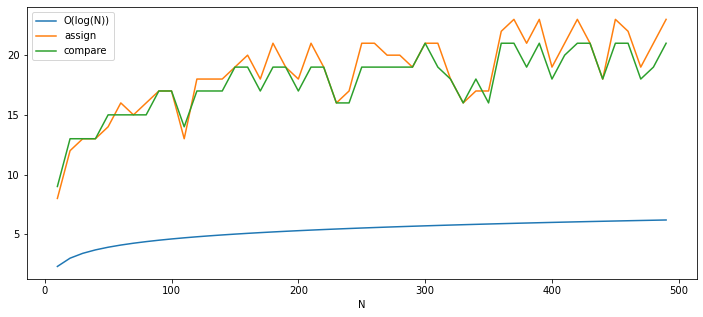

               Exercise 2
****************************************
>> Array A: 
 [381, 298, 11, 127, 150, 652, 599, 71, 263, 193, 421, 324, 266, 180, 389, 598, 942, 409, 929, 158]
>> Sort A: 
 [11, 71, 127, 150, 158, 180, 193, 263, 266, 298, 324, 381, 389, 409, 421, 598, 599, 652, 929, 942]
>> The 5th smallest in A: 158


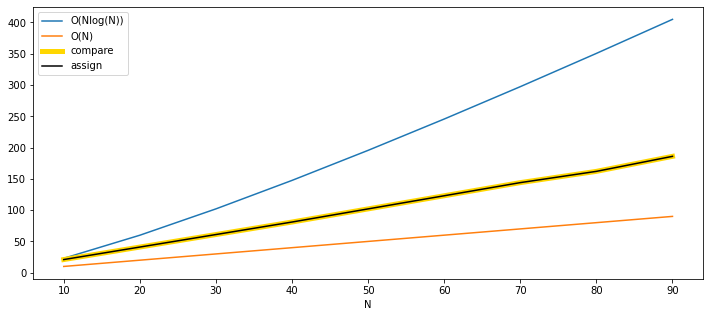

In [7]:
if __name__ == '__main__':
    main()